In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LpIOo51TriziCYxqzIZw")
project = rf.workspace("test-hmoom").project("cleaning_bot_dataset_2.0")
version = project.version(3)
dataset = version.download("voc")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 90.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cleaning_bot_dataset_2.0-3 in voc:: 100%|██████████| 5335/5335 [00:00<00:00, 7783.20it/s]


In [3]:
from google.colab import drive
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import requests
from glob import glob
from skimage import io
from io import BytesIO
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image, UnidentifiedImageError
import os
import shutil
import zipfile
import random

In [4]:
def rename_folder(folder_path, new_name):
    # Get the directory containing the folder
    parent_dir = os.path.dirname(folder_path)

    # Create the new path with the new folder name
    new_folder_path = os.path.join(parent_dir, new_name)

    # Rename the folder
    os.rename(folder_path, new_folder_path)

    print(f"Folder renamed from {folder_path} to {new_folder_path}")

# Find all matching folders using glob function
folder_paths = glob('/content/cleaning_bot_dataset_2.0-*')

if folder_paths:
    folder_path = folder_paths[0]  # Use the first match
    new_folder_name = 'cleaning_bot_object_dataset'  # New folder name
    rename_folder(folder_path, new_folder_name)
else:
    print("No matching folders found.")

Folder renamed from /content/cleaning_bot_dataset_2.0-3 to /content/cleaning_bot_object_dataset


splitting dataset into separate images and xml folders

In [5]:
def move_files_by_extension(source_directory, target_directory, file_extension):
    # Ensure the target directory exists (create it if it doesn't)
    os.makedirs(target_directory, exist_ok=True)

    # Walk through the source directory and its subdirectories
    for root, dirs, files in os.walk(source_directory):
        for file in files:
            # Check if the file has the specified extension
            if file.endswith(file_extension):
                # Create full path for source and destination
                source_path = os.path.join(root, file)
                target_path = os.path.join(target_directory, file)

                # Move the file
                shutil.move(source_path, target_path)
                print(f"Moved: {source_path} to {target_path}")

def organize_files(folder_name):
    # Define source and target directories based on the folder name
    source_directory = os.path.join("/content/cleaning_bot_object_dataset/", folder_name)
    xml_target_directory = os.path.join(source_directory, "xmls")
    images_target_directory = os.path.join(source_directory, "images")

    # Create target directories if they don't exist
    os.makedirs(xml_target_directory, exist_ok=True)
    os.makedirs(images_target_directory, exist_ok=True)

    # Move XML files
    move_files_by_extension(source_directory, xml_target_directory, ".xml")

    # Move JPG files
    move_files_by_extension(source_directory, images_target_directory, ".jpg")

organize_files("test")
organize_files("train")
organize_files("valid")


Streaming output truncated to the last 5000 lines.
Moved: /content/cleaning_bot_object_dataset/train/metal242_jpg.rf.f7f1c4d0917f8583b8fe02adb5dc18fd.jpg to /content/cleaning_bot_object_dataset/train/images/metal242_jpg.rf.f7f1c4d0917f8583b8fe02adb5dc18fd.jpg
Moved: /content/cleaning_bot_object_dataset/train/405207817_2349628111899460_6207981521016841263_n_jpg.rf.726c13bc71b1c65fb3182c043d1de0b6.jpg to /content/cleaning_bot_object_dataset/train/images/405207817_2349628111899460_6207981521016841263_n_jpg.rf.726c13bc71b1c65fb3182c043d1de0b6.jpg
Moved: /content/cleaning_bot_object_dataset/train/3221_2_0_0_1_2_0_fake_B_png.rf.d5a5b4b8aa10422eb45ec192f8312e62.jpg to /content/cleaning_bot_object_dataset/train/images/3221_2_0_0_1_2_0_fake_B_png.rf.d5a5b4b8aa10422eb45ec192f8312e62.jpg
Moved: /content/cleaning_bot_object_dataset/train/dirtimage_46_jpg.rf.d2a30844c71a3945e778bf5ce105b4c8.jpg to /content/cleaning_bot_object_dataset/train/images/dirtimage_46_jpg.rf.d2a30844c71a3945e778bf5ce105b4c8

In [6]:
# Define the source directories
source_dirs = ['/content/cleaning_bot_object_dataset/train', '/content/cleaning_bot_object_dataset/valid', '/content/cleaning_bot_object_dataset/test']

# Define the destination directory
destination_dir = '/content/cleaning_bot_object_dataset'
xml_dest_dir = os.path.join(destination_dir, 'xmls')
jpg_dest_dir = os.path.join(destination_dir, 'images')

# Create the destination directories if they do not exist
os.makedirs(xml_dest_dir, exist_ok=True)
os.makedirs(jpg_dest_dir, exist_ok=True)

# Copy XML and JPG files from source directories to destination directories
for src_dir in source_dirs:
    xml_src_dir = os.path.join(src_dir, 'xmls')
    jpg_src_dir = os.path.join(src_dir, 'images')

    # Copy XML files
    for filename in os.listdir(xml_src_dir):
        src_file = os.path.join(xml_src_dir, filename)
        dest_file = os.path.join(xml_dest_dir, filename)
        shutil.copy(src_file, dest_file)

    # Copy JPG files
    for filename in os.listdir(jpg_src_dir):
        src_file = os.path.join(jpg_src_dir, filename)
        dest_file = os.path.join(jpg_dest_dir, filename)
        shutil.copy(src_file, dest_file)

print("Files have been successfully combined.")


Files have been successfully combined.


In [7]:
def delete_folder(folder_path):

    if os.path.exists(folder_path):
        # Remove the folder and all its contents
        shutil.rmtree(folder_path)
        print(f"Folder '{folder_path}' and all its contents have been deleted.")
    else:
        print(f"Folder '{folder_path}' does not exist.")

In [8]:
folder_to_delete = '/content/cleaning_bot_object_dataset/train'
delete_folder(folder_to_delete)

folder_to_delete = '/content/cleaning_bot_object_dataset/valid'
delete_folder(folder_to_delete)

folder_to_delete = '/content/cleaning_bot_object_dataset/test'
delete_folder(folder_to_delete)

Folder '/content/cleaning_bot_object_dataset/train' and all its contents have been deleted.
Folder '/content/cleaning_bot_object_dataset/valid' and all its contents have been deleted.
Folder '/content/cleaning_bot_object_dataset/test' and all its contents have been deleted.


In [9]:
def count_files_in_folder(folder_path):
    # List all files in the folder
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    return len(files)

folder_path = '/content/cleaning_bot_object_dataset/xmls'
file_count = count_files_in_folder(folder_path)
print(f"Number of files in '{folder_path}': {file_count}")

folder_path = '/content/cleaning_bot_object_dataset/images'
file_count = count_files_in_folder(folder_path)
print(f"Number of files in '{folder_path}': {file_count}")


Number of files in '/content/cleaning_bot_object_dataset/xmls': 2666
Number of files in '/content/cleaning_bot_object_dataset/images': 2666


In [10]:
# Mount your Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
# Define the path to the zip file and the target directory
zip_file_path = '/content/drive/MyDrive/colab_notebooks/cleaning_bot/models/best_model.zip'  # zip file path
target_directory = '/content/cleaning_bot_object_dataset'  # target directory

# Create the target directory if it does not exist
os.makedirs(target_directory, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(target_directory)

print(f'Unzipped {zip_file_path} to {target_directory}')

Unzipped /content/drive/MyDrive/colab_notebooks/cleaning_bot/models/best_model.zip to /content/cleaning_bot_object_dataset


In [12]:
# Path to your .keras model file in Google Drive
model_path = '/content/cleaning_bot_object_dataset/content/models/best_model.keras'

# Load the model from Google Drive
model = tf.keras.models.load_model(model_path)


In [13]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 266,683,008 (1017.31 MB)

 Trainable params: 88,882,858 (339.06 MB)

 Non-trainable params: 34,432 (134.50 KB)

 Optimizer params: 177,765,718 (678.12 MB)

In [14]:
label_mapping = {'waste': 0,
                 'home_object': 1,
                 'pet': 2,
                 'person': 3,
                 'spill': 4,
                 'dirt': 5}
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

print(reverse_label_mapping)

{0: 'waste', 1: 'home_object', 2: 'pet', 3: 'person', 4: 'spill', 5: 'dirt'}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


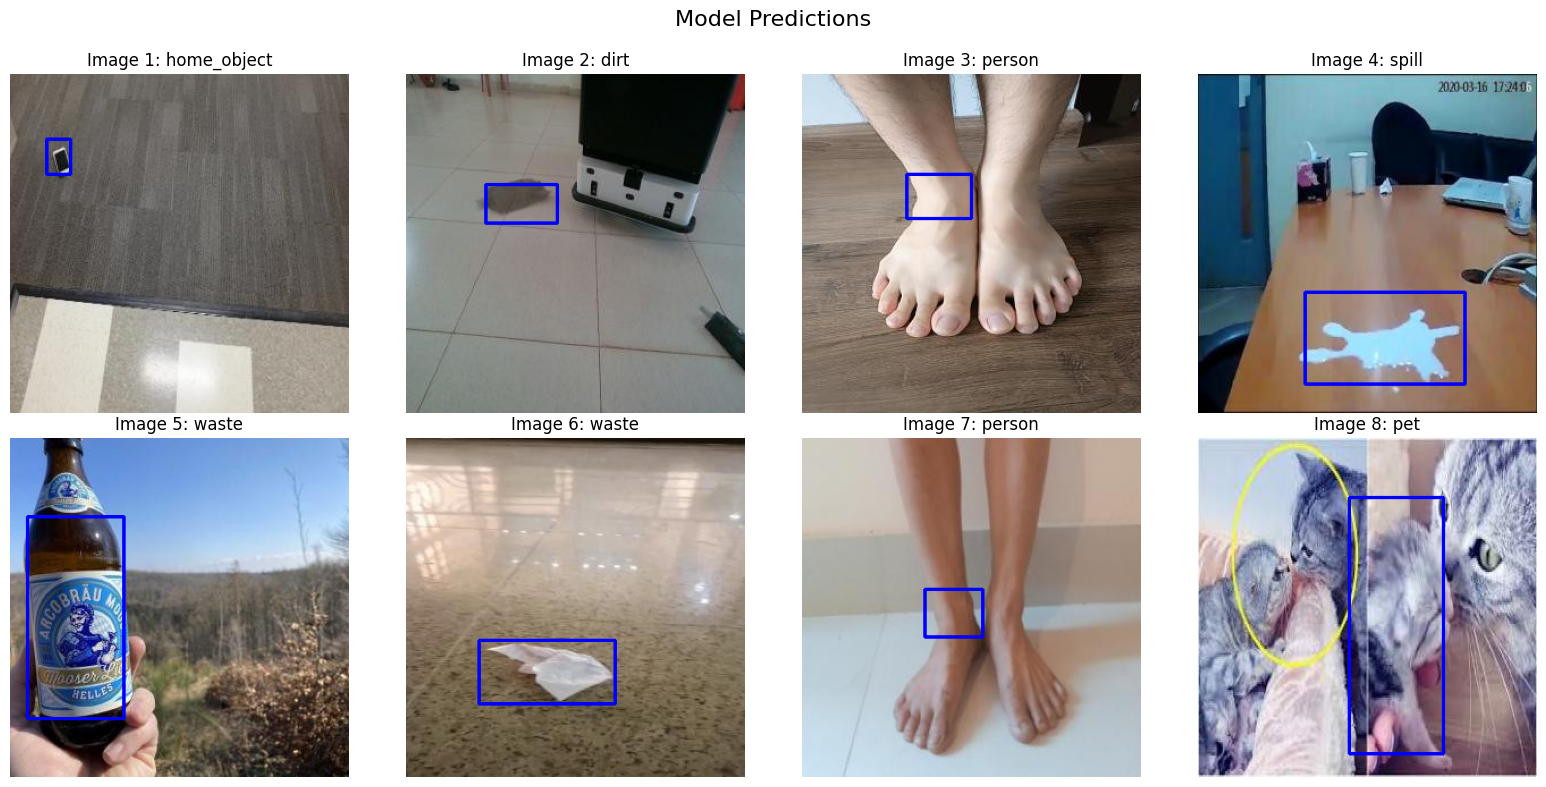

In [17]:
def load_image(path):
    """Load an image from a given path."""
    image = cv2.imread(path)
    if image is None:
        print(f"Error loading image from {path}")
    return image

def predict_random_xml_and_image(xml_folder, image_folder, model):
    """
    Selects random XML files from the xml_folder, loads corresponding images from the image_folder,
    and makes predictions using the provided model.

    Args:
    xml_folder: Path to the folder containing XML files.
    image_folder: Path to the folder containing image files.
    model: Pretrained model instance.
    """
    xml_files = [f for f in os.listdir(xml_folder) if f.endswith('.xml')]

    if not xml_files:
        print("No XML files found in the specified folder.")
        return

    # Choose a random set of 8 XML files
    random_xml_files = random.sample(xml_files, min(8, len(xml_files)))

    images = []
    predictions = []

    for random_xml_file in random_xml_files:
        base_name = os.path.splitext(random_xml_file)[0]
        image_file = os.path.join(image_folder, base_name + '.jpg')

        if not os.path.exists(image_file):
            print(f"Image file not found: {image_file}")
            continue

        image = load_image(image_file)
        images.append(image)

        # Get the model prediction
        annotated_image, prediction = _process_image(image, model)
        predictions.append((annotated_image, prediction))

    # Display images and predictions
    display_predictions(images, predictions)

def _process_image(image, model):
    """Process and predict on the loaded image."""
    image_resized = cv2.resize(image, (299, 299))
    image_array = np.expand_dims(image_resized, axis=0)

    # Get model predictions
    categ, bbox = model.predict(image_array)

    categ_index = np.argmax(categ)

    # Flatten and convert bbox coordinates to integers
    bbox = bbox.flatten().astype(int)

    # Draw bounding box on a copy of the resized image
    image_annotated = cv2.rectangle(image_resized.copy(), (bbox[0], bbox[1]), (bbox[2], bbox[3]), (255, 0, 0), 2)

    # Get the predicted class label
    prediction = reverse_label_mapping[categ_index]

    return image_annotated, prediction

def display_predictions(images, predictions):
    """Display images with predictions below each image in a grid."""
    # Create a 2x4 grid for 8 images
    fig, axs = plt.subplots(2, 4, figsize=(16, 8))
    fig.suptitle('Model Predictions', fontsize=16)

    for i, (ax, (img, prediction)) in enumerate(zip(axs.flatten(), predictions), start=1):
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')

        # Set title with image number and prediction
        ax.set_title(f'Image {i}: {prediction}', fontsize=12)

    plt.tight_layout(pad=1.2, h_pad=1)
    plt.subplots_adjust(top=0.9)  # Adjust title position
    plt.show()

# Define paths
xml_folder_path = '/content/cleaning_bot_object_dataset/xmls'
image_folder_path = '/content/cleaning_bot_object_dataset/images'

# Call the prediction function with the model
predict_random_xml_and_image(xml_folder_path, image_folder_path, model)
